In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv("C:/Users/SURAJ/Downloads/IMDB-Movie-Data.csv")

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## Data Cleaning
## Handling Missing Values

In [5]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median(), inplace = True)
df['Metascore'].fillna(df['Metascore'].median(), inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

## Explarotary Data Analysis (EDA)
## Top 10 highest - rated movies

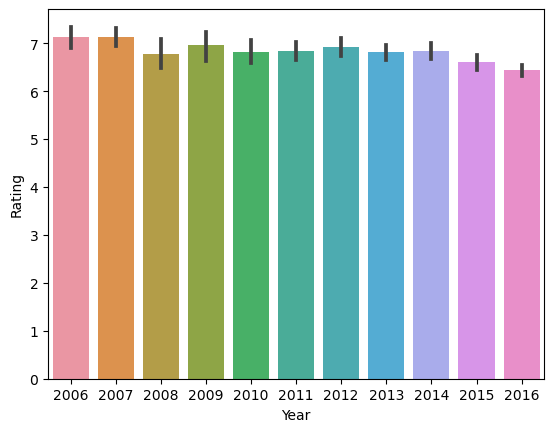

In [8]:
top_rated_movies = df[['Title', 'Year', 'Rating']].sort_values(by = 'Rating', ascending = False)
top_rated_movies.head(10)
sns.barplot(x = top_rated_movies['Year'], y = top_rated_movies['Rating'])
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

## Most popular Genre Analysis

In [9]:
from collections import Counter

In [10]:
all_genre = df['Genre'].str.split(',').sum()
genre_counts = Counter(all_genre)

genre_df = pd.DataFrame(genre_counts.items(), columns = ['Genre', 'Count']).sort_values(by = 'Count', ascending = False)
genre_df.head(10)

,Genre,Count
10,Drama,513
0,Action,303
7,Comedy,279
1,Adventure,259
5,Thriller,195
15,Crime,150
13,Romance,141
2,Sci-Fi,120
4,Horror,119
3,Mystery,106


## Revenue vs Genre Analysis

In [11]:
genre_revenue = {}

for index, row in df.iterrows():
    genres = row['Genre'].split(',')
    revenue = row['Revenue (Millions)']
    for genre in genres:
        if genre in genre_revenue:
            genre_revenue[genre].append(revenue)
        else:
            genre_revenue[genre] = [revenue]

genre_avg_revenue = {genre: sum(rev)/len(rev) for genre, rev in genre_revenue.items()}

genre_revenue_df = pd.DataFrame(genre_avg_revenue.items(), columns = ['Genre', 'Revenue (Millions)']).sort_values(by = 'Revenue (Millions)', ascending = False)
genre_revenue_df.head(10)

,Genre,Revenue (Millions)
6,Animation,185.376939
1,Adventure,151.306969
2,Sci-Fi,128.255250
9,Fantasy,125.207327
8,Family,123.109412
0,Action,120.201865
16,Western,93.584286
18,Musical,81.642000
7,Comedy,73.362330
5,Thriller,64.926615


## Revenue vs IMDb Rating Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

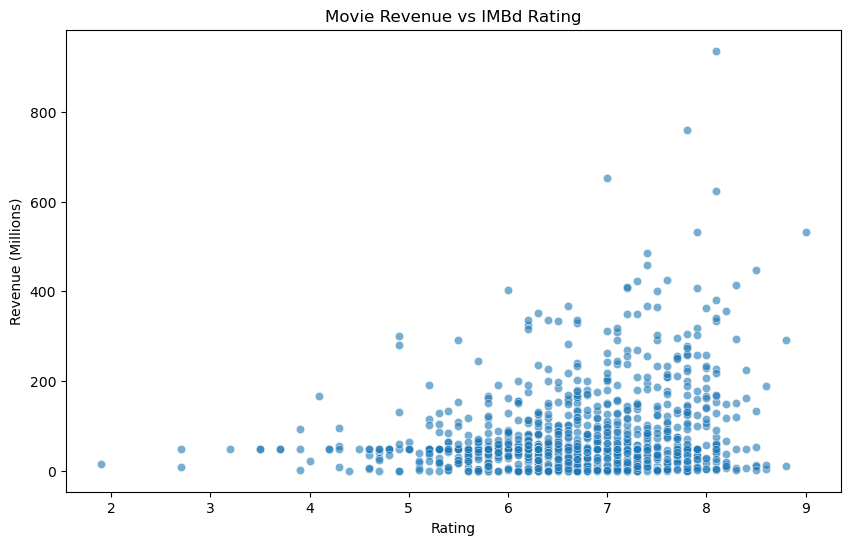

In [13]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['Rating'], y = df['Revenue (Millions)'], alpha = 0.6)
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.title('Movie Revenue vs IMBd Rating')
plt.show()

## Director vs Actor Influnce

In [14]:
top_director = df[df['Rating'] >= 8.0]['Director'].value_counts().head(10)

all_actors = df[df['Rating'] >= 8.0]['Actors'].str.split(',').sum()
top_actors = pd.Series(all_actors).value_counts().head(10)

top_director, top_actors

(Director
 Christopher Nolan    5
 Denis Villeneuve     3
 Martin Scorsese      3
 Pete Docter          2
 Quentin Tarantino    2
 Damien Chazelle      2
 Rajkumar Hirani      2
 J.J. Abrams          2
 Neill Blomkamp       1
 Thomas Vinterberg    1
 Name: count, dtype: int64,
 Leonardo DiCaprio      6
 Matthew McConaughey    3
 Christian Bale         3
 Aamir Khan             3
  Scarlett Johansson    3
  J.K. Simmons          2
  Hugh Jackman          2
  Anne Hathaway         2
  Emma Watson           2
  Joan Allen            2
 Name: count, dtype: int64)

## IMBd Rating Distribution

C:\Users\SURAJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


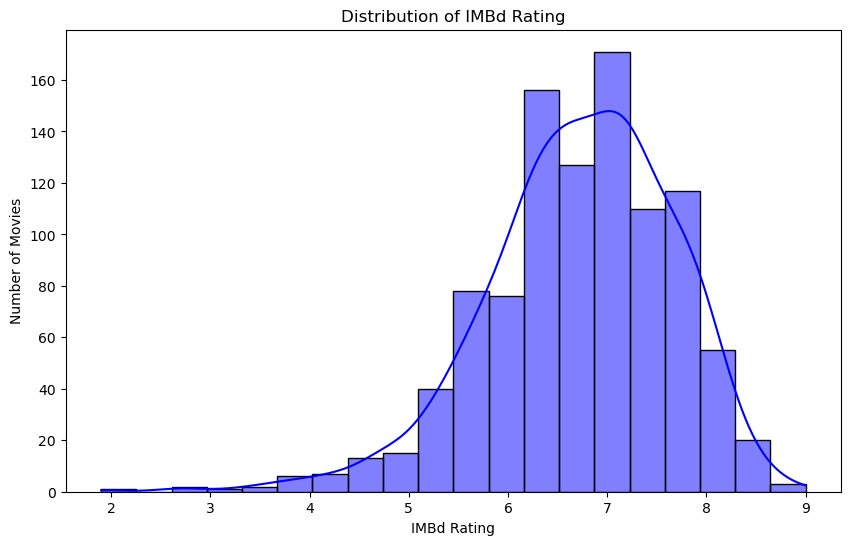

In [15]:
plt.figure(figsize = (10,6))
sns.histplot(df['Rating'], bins = 20, kde = True, color = 'blue')
plt.xlabel('IMBd Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of IMBd Rating')
plt.show()

## Top 10 Movies by Revenue

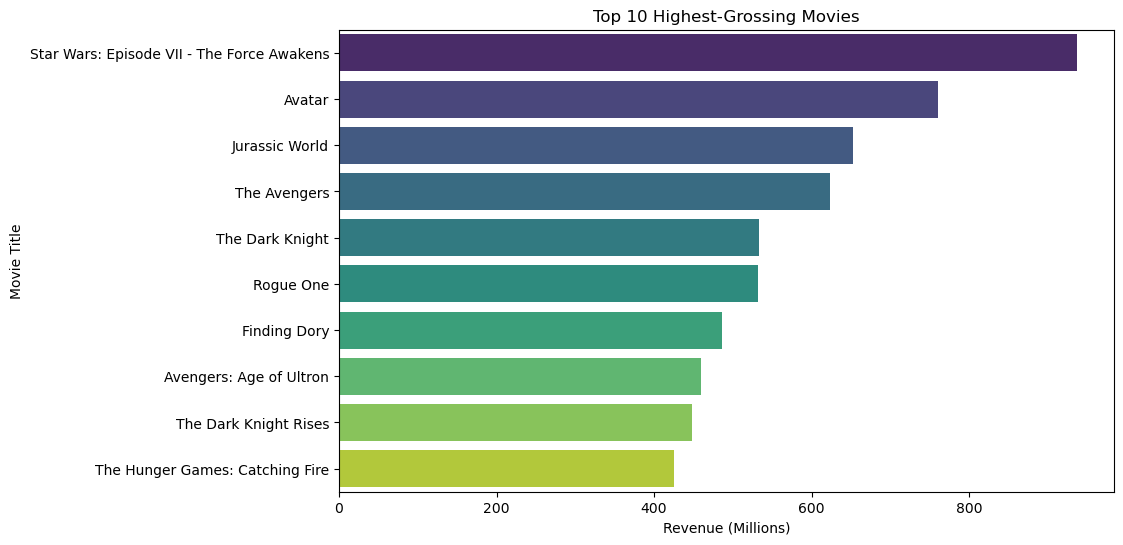

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


In [16]:
top_revenue_movies = df[['Title', 'Revenue (Millions)']].sort_values(by = 'Revenue (Millions)', ascending = False).head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = 'Revenue (Millions)', y = 'Title', data = top_revenue_movies, palette = 'viridis')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest-Grossing Movies')
plt.show()

top_revenue_movies

## Revenue trends over years

C:\Users\SURAJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SURAJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


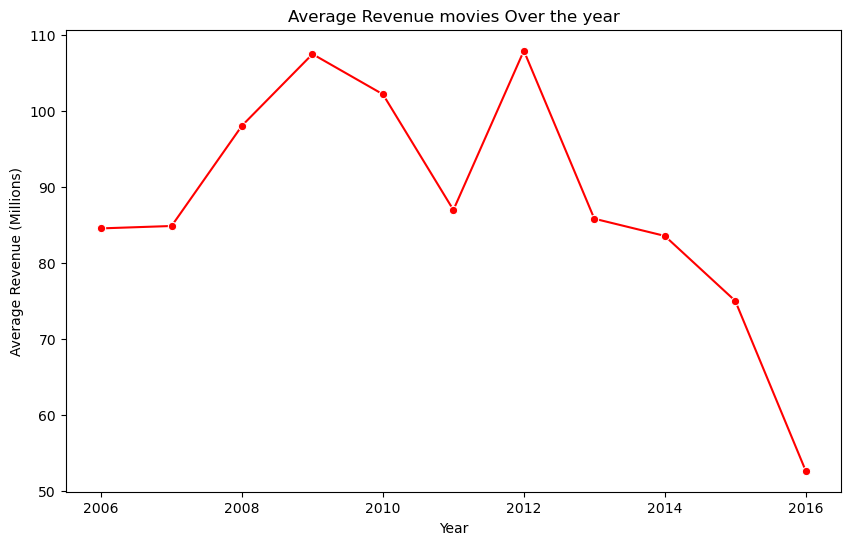

,Year,Revenue (Millions)
1,2007,84.871132
2,2008,98.100096
3,2009,107.533333
4,2010,102.226750
5,2011,86.983254
6,2012,107.973281
7,2013,85.831593
8,2014,83.564694
9,2015,75.007165
10,2016,52.613704


In [17]:
revenue_by_year = df.groupby('Year')['Revenue (Millions)'].mean().reset_index()

plt.figure(figsize = (10,6))
sns.lineplot(x = 'Year', y = 'Revenue (Millions)', data = revenue_by_year, marker = 'o', color = 'red')
plt.xlabel('Year')
plt.ylabel('Average Revenue (Millions)')
plt.title('Average Revenue movies Over the year')
plt.show()

revenue_by_year.tail(10)


## Average Movie Runtime by Genre

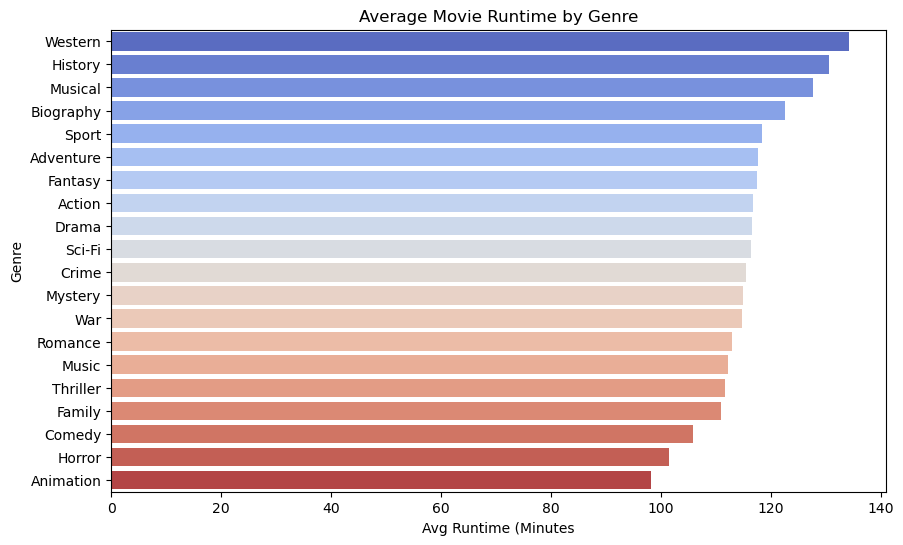

,Genre,Runtime (Minutes)
15,Crime,115.413333
3,Mystery,115.000000
17,War,114.846154
13,Romance,113.007092
11,Music,112.187500
5,Thriller,111.769231
8,Family,110.980392
7,Comedy,105.899642
4,Horror,101.563025
6,Animation,98.142857


In [18]:
genre_runtime = {}

for index, row in df.iterrows():
    genres = row['Genre'].split(',')
    runtime = row['Runtime (Minutes)']
    for genre in genres:
        if genre in genre_runtime:
            genre_runtime[genre].append(runtime)
        else:
            genre_runtime[genre] = [runtime]
            
genre_avg_runtime = {genre: sum(rt)/len(rt) for genre, rt in genre_runtime.items()}

genre_runtime_df = pd.DataFrame(genre_avg_runtime.items(), columns = ['Genre', 'Runtime (Minutes)']).sort_values(by = 'Runtime (Minutes)', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(x = 'Runtime (Minutes)',  y='Genre', data = genre_runtime_df, palette = 'coolwarm')
plt.xlabel('Avg Runtime (Minutes')
plt.ylabel('Genre')
plt.title('Average Movie Runtime by Genre')
plt.show()

genre_runtime_df.tail(10)

## Correlation Heatmap for Numeric Features

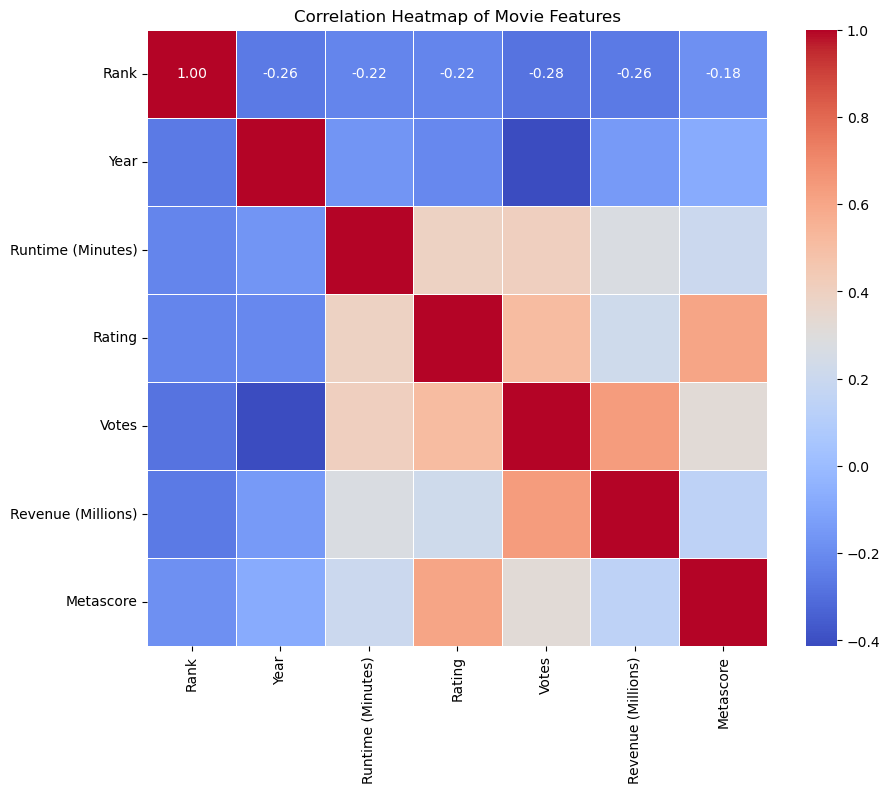

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr().fillna(0), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Movie Features')
plt.show()